In [ ]:
import pandas as pd
import matplotlib as plt
import sqlite3
import os
import seaborn as sns

In [ ]:
#retriing table names from data frame
im_path = r"C:\Users\HP\Desktop\moringa\PHASE1_PROJECT\im.db\im.db"

conn = sqlite3.connect(im_path)
cursor = conn.cursor()

table_name_query = """ SELECT name
                       AS 'Table Names' 
                       FROM sqlite_master 
                       WHERE type='table';
                       """

table_names = pd.read_sql(table_name_query, conn)

print(table_names)

In [ ]:
q = """SELECT *
       FROM directors;
    """
df = pd.read_sql(q, conn)

print(df.head())

In [ ]:
# marging the movie mudgets in csv file and  cleaning them up
budget_one = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\tn.movie_budgets.csv\\tn.movie_budgets.csv")
budget_two = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\bom.movie_gross.csv\\bom.movie_gross.csv")


In [ ]:
budget_one.head()
budget_one.tail()

In [ ]:
print(budget_one.columns)

In [ ]:
budget_one

In [ ]:
print(budget_two.columns)

In [ ]:
budget_two.drop(columns=["studio", "year"], inplace=True)
budget_two

In [ ]:
budget_two.columns = ['movie', 'domestic_gross', 'worldwide_gross']

# Print the updated DataFrame
print(budget_two)

In [ ]:
merged_revenue=pd.concat([budget_one, budget_two])
merged_revenue

In [ ]:
merged_revenue.drop_duplicates()

In [ ]:
merged_revenue['domestic_gross'] = pd.to_numeric(merged_revenue['domestic_gross'], errors='coerce')


In [ ]:
merged_revenue['domestic_gross'].mean()

In [ ]:
median_value=merged_revenue['domestic_gross'].median()
median_value

In [ ]:
merged_revenue['domestic_gross'].max()

In [ ]:
merged_revenue['domestic_gross'].describe()

In [ ]:
merged_revenue['domestic_gross'] = merged_revenue['domestic_gross'].fillna(median_value)

In [ ]:
merged_revenue['worldwide_gross'].describe()

In [ ]:
# im trying to remove the /$ signs 
merged_revenue['worldwide_gross'] = pd.to_numeric(merged_revenue['worldwide_gross'].replace('[\$,]', '', regex=True), errors='coerce')


In [ ]:
median=merged_revenue['worldwide_gross'].median()

In [ ]:
merged_revenue['worldwide_gross'] = merged_revenue['worldwide_gross'].fillna(median)

In [ ]:
merged_revenue['worldwide_gross'].describe()

In [ ]:
m1 = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\tn.movie_budgets.csv\\tn.movie_budgets.csv")
m1

In [ ]:

production_budget = m1['production_budget']

production_budget = pd.to_numeric(production_budget.replace('[\$,]', '', regex=True), errors='coerce')
production_budget

In [ ]:
Release_year = m1['release_date']
Release_year

In [ ]:
merged_revenue['Release_year'] = Release_year

In [ ]:
production_budget.describe()

In [ ]:
merged_revenue
pd.set_option('display.float_format', '{:.2f}'.format)
merged_revenue

In [ ]:
merged_revenue['production_budget'] = production_budget
merged_revenue

In [ ]:
merged_revenue['production_budget'].describe()

In [ ]:
merged_revenue['production_budget'] = pd.to_numeric(merged_revenue['production_budget'].replace('[\$,]', '', regex=True), errors='coerce')

In [ ]:
median_production=merged_revenue['production_budget'].median()

In [ ]:
merged_revenue['production_budget'] = merged_revenue['production_budget'].fillna(median_production)

In [ ]:
merged_revenue['Total_revenue'] = merged_revenue['domestic_gross'] + merged_revenue['worldwide_gross']
merged_revenue['Total_revenue'] 

In [ ]:
merged_revenue['ROI'] = ((merged_revenue['Total_revenue'] - merged_revenue['production_budget']) / merged_revenue['production_budget']) * 100
merged_revenue['ROI']

In [ ]:
merged_revenue['domestic_gross'] = merged_revenue['domestic_gross'].round().astype(int)

merged_revenue['worldwide_gross'] = merged_revenue['worldwide_gross'].round().astype(int)

In [ ]:
merged_revenue

In [ ]:
import matplotlib.pyplot as plt

# Check if 'figure' is overwritten
print(plt.figure)

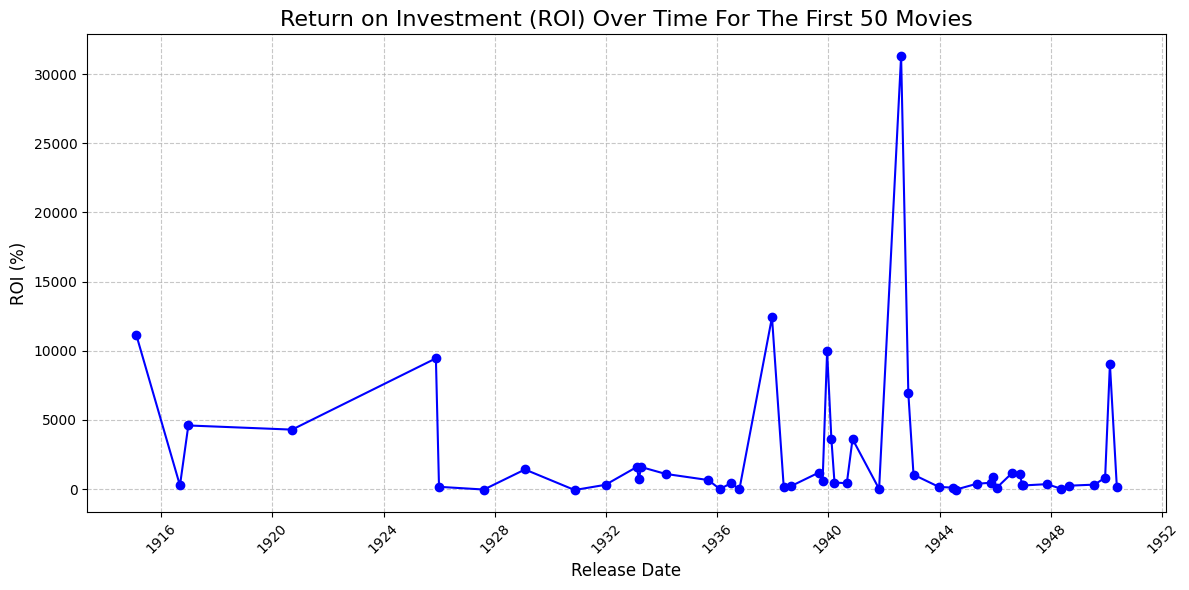

In [263]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
merged_revenue['release_date'] = pd.to_datetime(merged_revenue['release_date'], errors='coerce')

# Sorting the DataFrame by 'release_date' to ensure the plot is in chronological order
merged_revenue = merged_revenue.sort_values(by='release_date')

# Plotting ROI over time for the first 50 rows using a line graph
plt.figure(figsize=(12, 6))
plt.plot(merged_revenue['release_date'].head(50), merged_revenue['ROI'].head(50), marker='o', linestyle='-', color='b')
plt.title('Return on Investment (ROI) Over Time For The First 50 Movies', fontsize=16)
plt.xlabel('Release Date', fontsize=12)
plt.ylabel('ROI (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [272]:
# finding out what the data looks like
descriptive_analysis= merged_revenue[['production_budget', 'Total_revenue', 'ROI']].describe()
print(descriptive_analysis)


       production_budget  Total_revenue       ROI
count            9169.00        9169.00   9169.00
mean         38672786.36    89464546.28    419.05
std          44260385.86   171836019.58   3203.69
min              1100.00        4900.00    -99.99
25%          11000000.00     8744000.00    -36.73
50%          25000000.00    26048680.00     54.35
75%          50000000.00    86546165.00    255.20
max         425000000.00  2777745279.00 185500.00


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


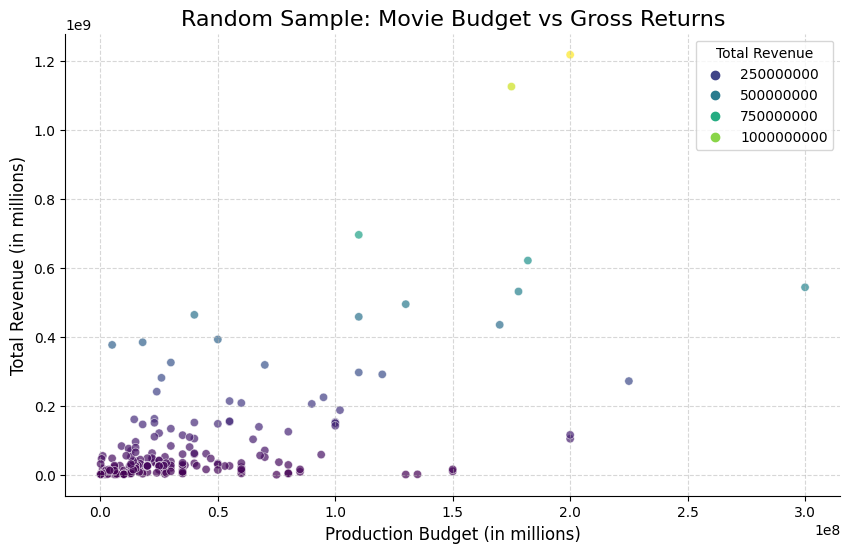

In [252]:
# finding the corelation between production budget and total revenue returned(random samples)
random_sample = merged_revenue.sample(n=200, random_state=42) 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='Total_revenue', data=random_sample, hue='Total_revenue', palette='viridis', alpha=0.7, marker='o')
plt.title('Random Sample: Movie Budget vs Gross Returns', fontsize=16)
plt.xlabel('Production Budget (in millions)', fontsize=12)
plt.ylabel('Total Revenue (in millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.legend(title='Total Revenue', bbox_to_anchor=(1, 1))
plt.show()

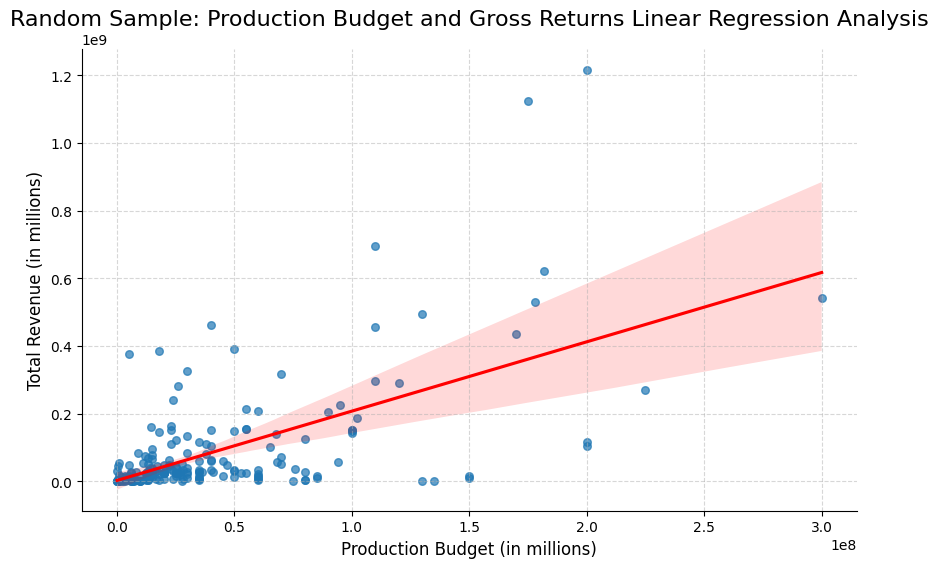

In [271]:
# linear regression analysisi
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='Total_revenue', data=random_sample, scatter_kws={'alpha':0.7, 's': 30}, line_kws={'color': 'red'})
plt.title('Random Sample: Production Budget and Gross Returns Linear Regression Analysis', fontsize=16)
plt.xlabel('Production Budget (in millions)', fontsize=12)
plt.ylabel('Total Revenue (in millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.show()

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


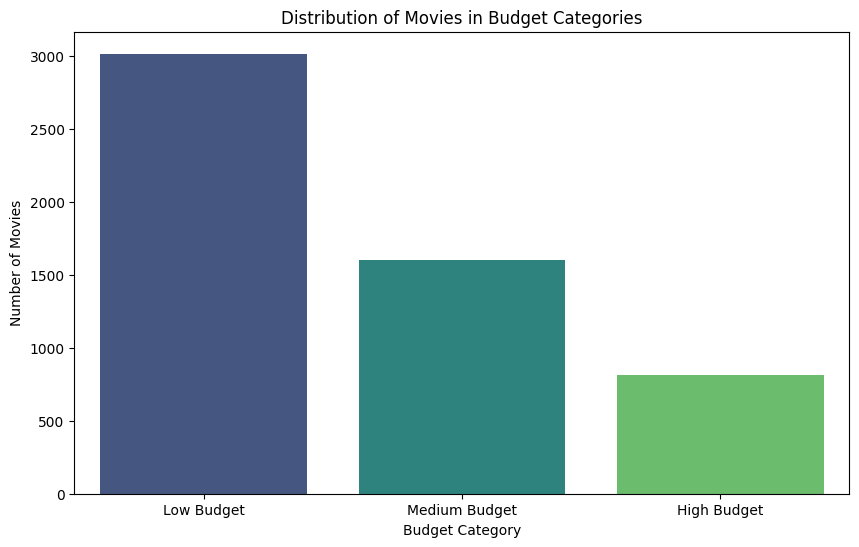

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


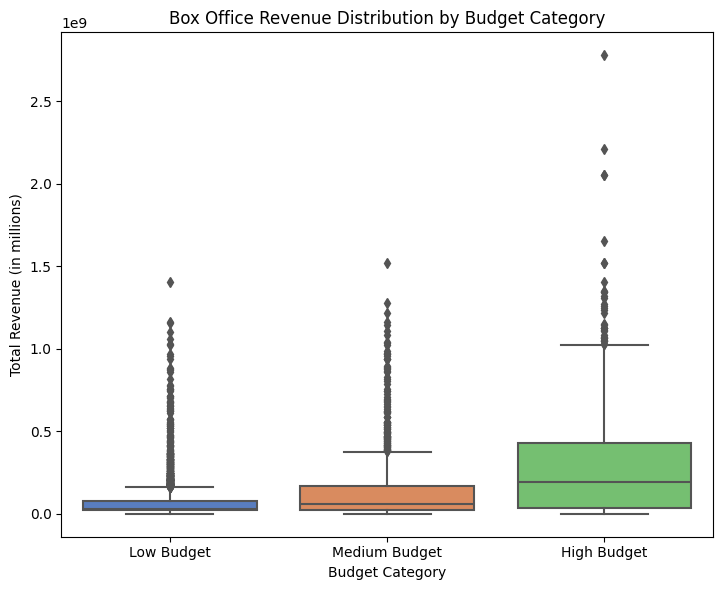

In [265]:
#  budget categories by definations
budget_bins = [20000000, 50000000, 100000000, float('inf')]  
budget_labels = ['Low Budget', 'Medium Budget', 'High Budget']

# Created a new column 'Budget_Category' based on budget ranges
merged_revenue['Budget_Category'] = pd.cut(merged_revenue['production_budget'], bins=budget_bins, labels=budget_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='Budget_Category', data=merged_revenue, palette='viridis')
plt.title('Distribution of Movies in Budget Categories')
plt.xlabel('Budget Category')
plt.ylabel('Number of Movies')
plt.show()

# analysis on revenue and reviews by budget category
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Budget_Category', y='Total_revenue', data=merged_revenue, palette='muted')
plt.title('Box Office Revenue Distribution by Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Total Revenue (in millions)')

plt.tight_layout()
plt.show()

In [ ]:
top_gross_return = merged_revenue.sort_values(by='Total_revenue', ascending=False).head(10)
top_gross_return 


In [ ]:
low_gross_return = merged_revenue.sort_values(by='Total_revenue', ascending=False).tail(10)
low_gross_return

In [ ]:
# correlation between production cost and revenue return
correlation_budget_revenue = merged_revenue['production_budget'].corr(merged_revenue['Total_revenue'])
correlation_budget_revenue

In [ ]:
Basic_info = '''
                 SELECT * FROM movie_basics;
'''

cursor.execute(Basic_info)

rows = cursor.fetchall()

for row in rows:
    print(row)

In [ ]:
Movies_release = '''
                 SELECT start_year, COUNT(*) AS movie_count
                 FROM movie_basics
                 GROUP BY start_year
                 ORDER BY start_year;
'''
cursor.execute(Movies_release)

rows = cursor.fetchall()

for row in rows:
    print(row)

In [ ]:
# executing sql queries on im.db
audience_Ratings_above_avg=''' 
                 SELECT *
                 FROM movie_ratings
                 WHERE averagerating >= 7.0;              
'''
cursor.execute(audience_Ratings_above_avg)

rows = cursor.fetchall()

for row in rows:
    print(row)


In [ ]:
geners_above_avg = '''
                 SELECT genres, AVG(averagerating) AS avg_rating
                 FROM movie_basics
                 JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
                 GROUP BY genres
                 HAVING avg_rating > 7.0;
'''

cursor.execute(geners_above_avg)

rows = cursor.fetchall()

for row in rows:
    print(row)



In [ ]:
Proffesions = '''
                 SELECT primary_name, primary_profession
                 FROM persons;
'''

cursor.execute(Proffesions)

rows = cursor.fetchall()

for row in rows:
    print(row)

In [ ]:
recognised_by = '''
                 SELECT persons.primary_name, known_for.movie_id
                 FROM persons
                 LEFT JOIN known_for ON persons.person_id = known_for.person_id;
'''

cursor.execute(recognised_by)

rows = cursor.fetchall()

for row in rows:
        print(row)


In [ ]:
English_movies= '''
                  SELECT title, region, language
                 FROM movie_akas
                 WHERE language = "en";
'''

cursor.execute(English_movies)

rows = cursor.fetchall()

for row in rows:
     print(row)
 

In [ ]:
critics_file = r'C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\rt.reviews.tsv\\rt.reviews.tsv'

critics_reviews = pd.read_csv(critics_file, sep='\t', encoding='latin-1')

critics_reviews


In [ ]:
movies_info_file = r"C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\rt.movie_info.tsv\\rt.movie_info.tsv"

movies_info = pd.read_csv(movies_info_file, sep='\t', encoding='latin-1')

movies_info

In [ ]:
movies_info.drop(columns=['synopsis', 'theater_date',	'dvd_date', 'currency', 'box_office'])

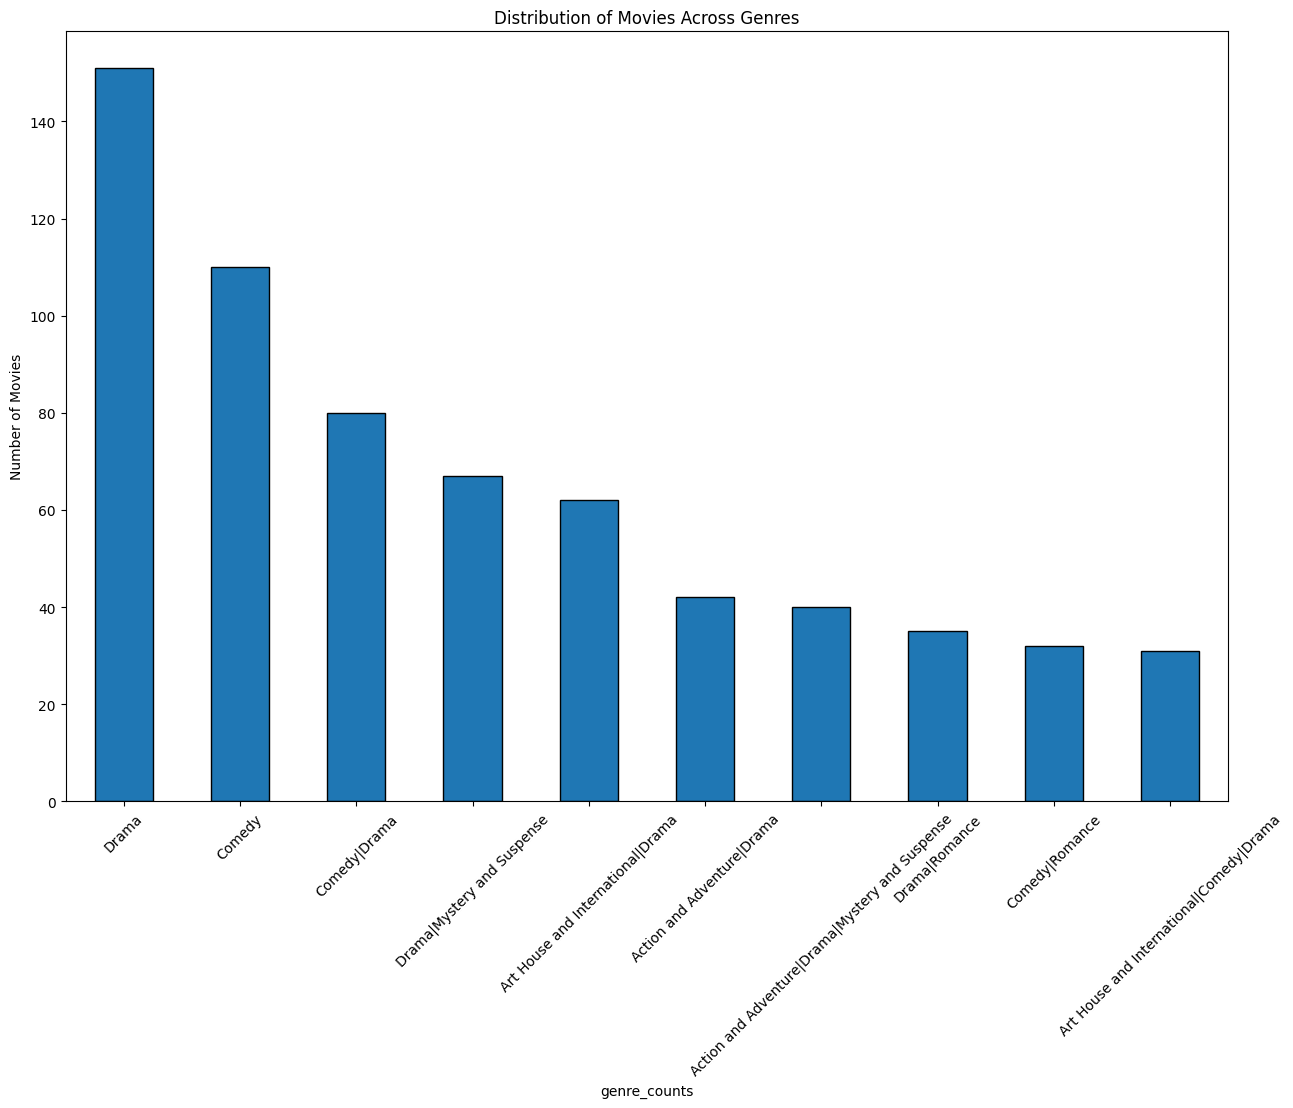

In [267]:
# Distribution of produced movies by geners
genre_counts = movies_info['genre'].value_counts()
genre_counts.head(10)

genre_counts.head(10).plot(kind='bar', edgecolor='black', rot=45, figsize=(15, 10))
plt.title('Distribution of Movies Across Genres')
plt.xlabel('genre_counts')
plt.ylabel('Number of Movies')
plt.show()

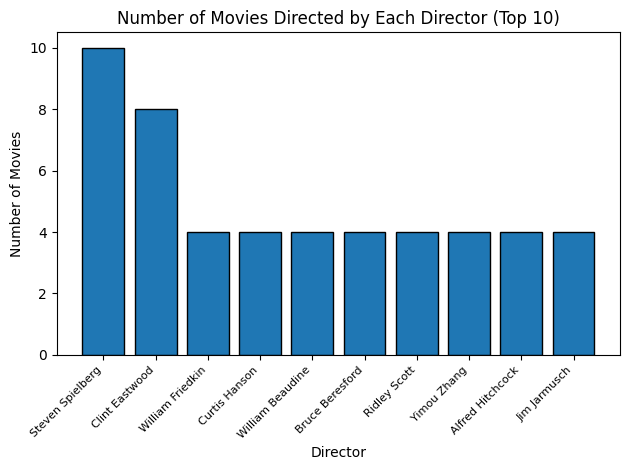

In [268]:
# Distribution of Novies Produced by Directors
directors_counts = movies_info['director'].value_counts()
directors_counts.head(10)

plt.bar(directors_counts.index[:10], directors_counts.head(10).values, edgecolor='black', width=0.8)
plt.title('Number of Movies Directed by Each Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
writers_count=movies_info['writer'].value_counts()
writers_count

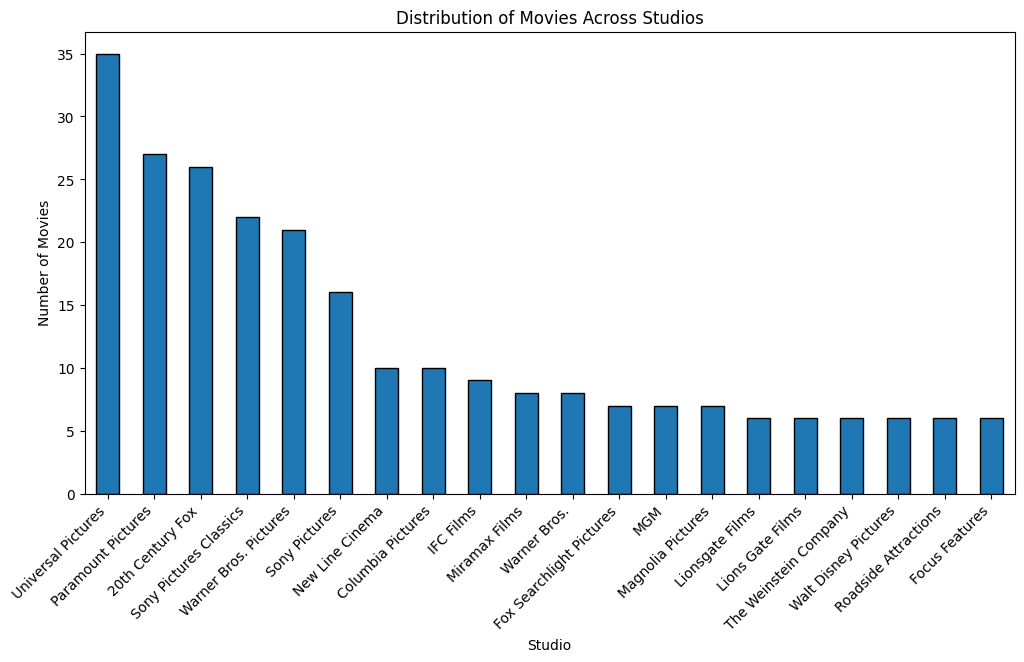

In [269]:
# distribution by studios
studios_count=movies_info['studio'].value_counts()
studios_count.head(20)

studios_count.head(20).plot(kind='bar', edgecolor='black', figsize=(12, 6))
plt.title('Distribution of Movies Across Studios')
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [ ]:
movies_info['runtime'].describe()

In [ ]:
critics_reviews['fresh'].value_counts()


In [ ]:
critics_reviews['rating'].value_counts()

In [ ]:
critics_reviews['critic'].value_counts()

In [ ]:
critics_reviews['publisher'].value_counts()

In [ ]:
publishers_with_fresh_reviews = critics_reviews[critics_reviews['fresh'] == 'fresh']
publishers_with_fresh_reviews.head()

In [ ]:
publishers_with_rotten_reviews = critics_reviews[critics_reviews['fresh'] == 'rotten']
publishers_with_rotten_reviews